In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymysql

In [14]:
#建立游标，读取数据
con=pymysql.connect(host='10.100.143.243',port=3310,user='std_risk4'\
                   ,passwd='GTDhG3p5',db='std_risk_analysis',charset='utf8')
cur=con.cursor()
cur.execute('select * from std_risk_analysis.hxg_bas_granted_grp')

24587

In [15]:
#查看字段名称 并形成一个字段名的list
cur.description  
dat=list(cur.fetchall())
data_dict=[]
for field in cur.description:
    data_dict.append(field[0])
        
#形成数据框
data=pd.DataFrame(dat,columns=data_dict)
data.columns

Index(['flag_appr', 'max_platform', 'month_decision', 'cut_score_V4',
       'cut_amt_granted', 'cut_gmv_12', 'final_rate_new',
       'decision_credit_type', 'flag_revolving', 'status_credit',
       'platform_import', 'year_decision', 'num', 'flag_appr_cnt',
       'flag_credit', 'mon_apply', 'gmv12', 'shop_year', 'RF_score_v4',
       'RF_v4_cnt', 'amt_granted_w'],
      dtype='object')

In [32]:
key='platform_import'

GroupByKey=['month_decision'\
           ,key\
           ]

In [17]:
## 通过率
dat1=data.groupby(GroupByKey,as_index=False).agg({'flag_appr_cnt':sum,'num':sum})
dat1['appr_rate']=dat1.flag_appr_cnt/dat1.num
dat1['refuse']=dat1.num-dat1.flag_appr_cnt

 ## object类型在画图是无法叠加，需要转化为int类型
print(dat1.dtypes) 
to_int=pd.DataFrame(dat1.flag_appr_cnt,dtype=np.int)
dat1['flag_appr']=to_int
print('---------更改类型变化后----------------')
print(dat1.dtypes)

month_decision     object
platform_import    object
flag_appr_cnt      object
num                object
appr_rate          object
refuse             object
dtype: object
---------更改类型变化后----------------
month_decision     object
platform_import    object
flag_appr_cnt      object
num                object
appr_rate          object
refuse             object
flag_appr           int32
dtype: object


Text(0.5,1,'Domestic')

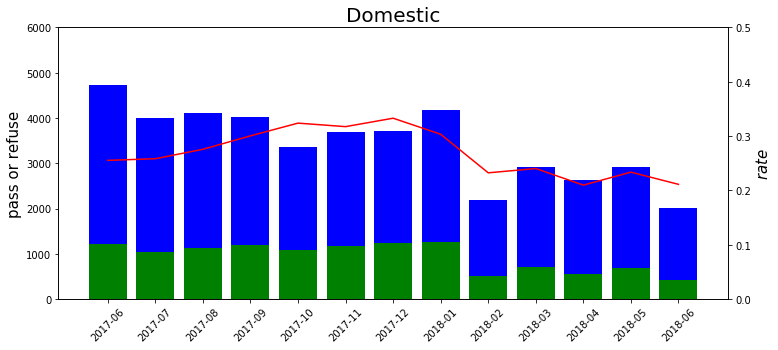

In [18]:
title='Domestic'    # Domestic,oversea,dataloan              Rate_tot
dat1_hist=dat1.loc[(dat1.month_decision>='2017-06')\
                    & (dat1[key]==title)\
                  ]

fig=plt.figure(figsize=(12,5))
ax1=fig.add_subplot(1,1,1)
ax1.bar(dat1_hist.month_decision,dat1_hist.flag_appr,color='g')
ax1.bar(dat1_hist.month_decision,dat1_hist.refuse,color='b',bottom=dat1_hist.flag_appr)
ax1.set_ylim(0,6000)
ax1.set_ylabel('pass or refuse',size=15)
plt.xticks(rotation=45)

ax2=ax1.twinx()
ax2.plot(dat1_hist.month_decision,dat1_hist.appr_rate,'-',color='r')
ax2.set_ylim(0,0.5)
ax2.set_ylabel(u'$rate$',size=15)
plt.xticks(rotation=45)

plt.title(title,size=20)

In [35]:
## 授信件均
dat2=data.groupby(GroupByKey,as_index=False).agg({'amt_granted_w':sum,'flag_appr_cnt':sum})
dat2['amt_granted_w']=dat2['amt_granted_w'].astype(int)
dat2['flag_appr_cnt']=dat2['flag_appr_cnt'].astype(int)
dat2['avg_granted_w']=dat2.amt_granted_w/dat2.flag_appr_cnt

Text(0.5,1,'Domestic')

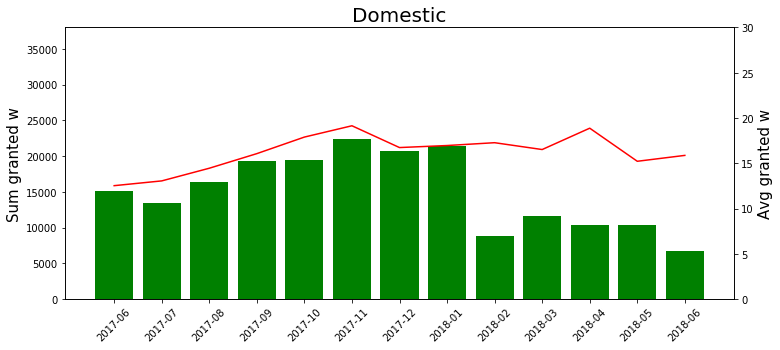

In [37]:
title='Domestic'    #Oversea,dataloan              Rate_tot
dat2_hist=dat2.loc[(dat1.month_decision>='2017-06')\
                    & (dat1[key]==title)\
                  ]
fig=plt.figure(figsize=(12,5))
ax1=fig.add_subplot(1,1,1)
ax1.bar(dat2_hist.month_decision,dat2_hist.amt_granted_w,color='g')
ax1.set_ylim(0,38000)
ax1.set_ylabel('Sum granted w',size=15)
plt.xticks(rotation=45)

ax2=ax1.twinx()
ax2.plot(dat2_hist.month_decision,dat2_hist.avg_granted_w,'-',color='r')
ax2.set_ylim(0,30)
ax2.set_ylabel('Avg granted w',size=15)
plt.xticks(rotation=45)

plt.title(title,size=20)

In [28]:
dat2_hist

,month_decision,amt_granted_w,flag_appr_cnt,avg_granted_w


In [ ]:
### 关闭数据库库连接
con.commit()  
cur.close()  
con.close() 